In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import pickle
import scipy.stats as stats
import scipy.optimize as opt
import scipy.integrate as integrate
import scipy.interpolate as interpolate
import scipy.special as special

In [2]:
df = pd.read_feather('outputs/correlation_dataframe.feather')
pairplot_df = df.drop(['region', 'station'], axis=1)

<Figure size 2000x1500 with 0 Axes>

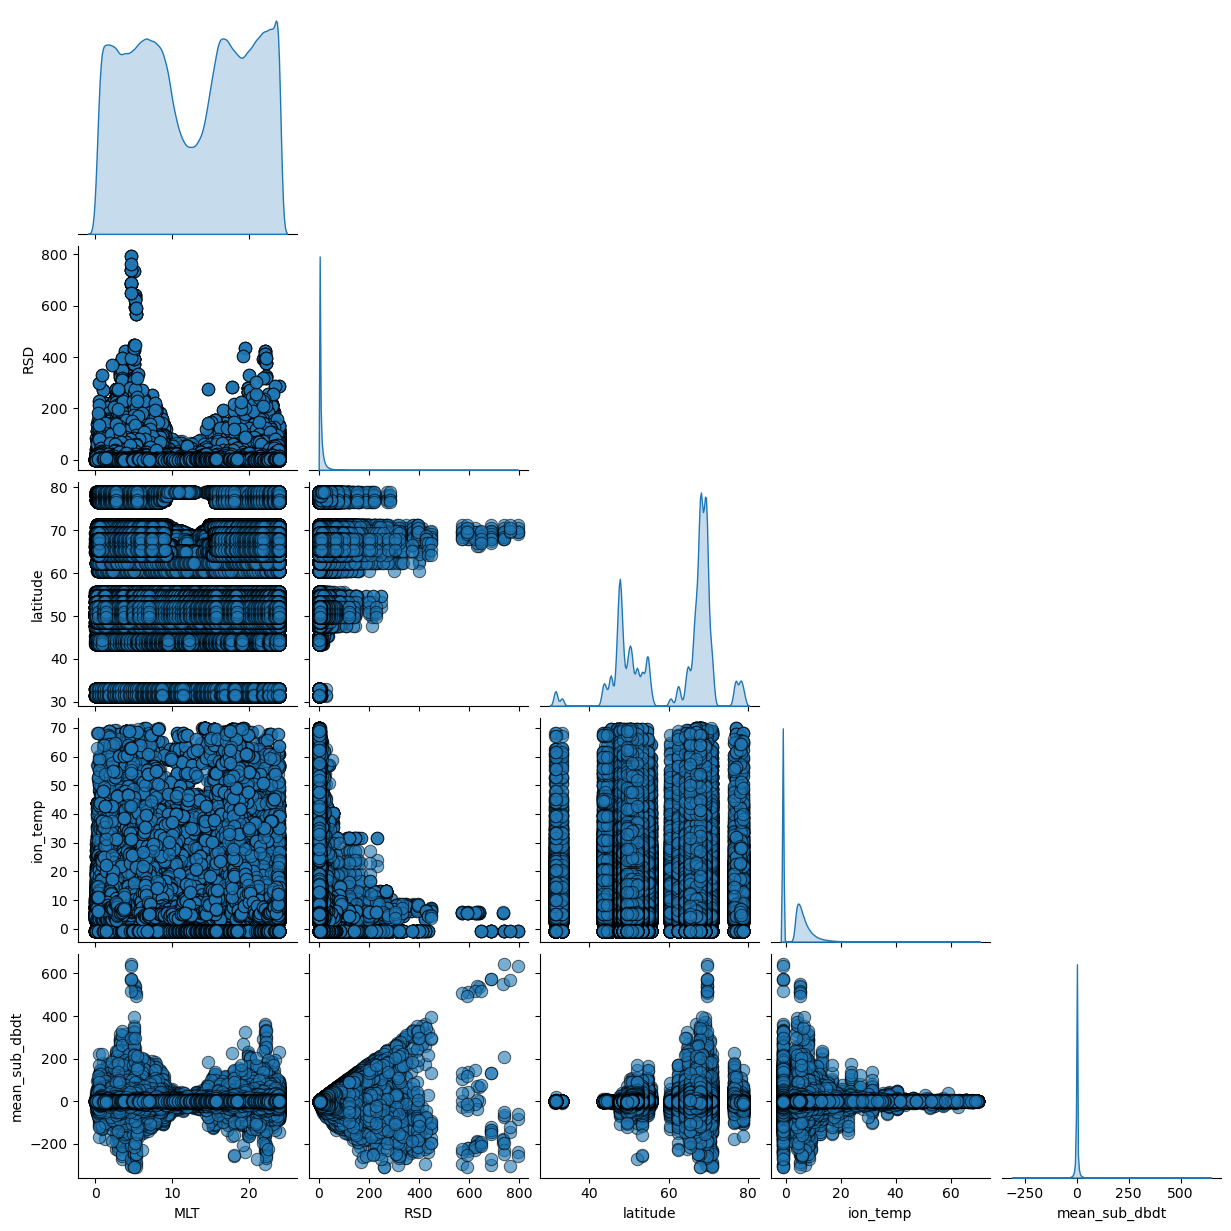

In [3]:
fig = plt.figure(figsize=(20,15))
sns.pairplot(pairplot_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, corner=True)
plt.show()

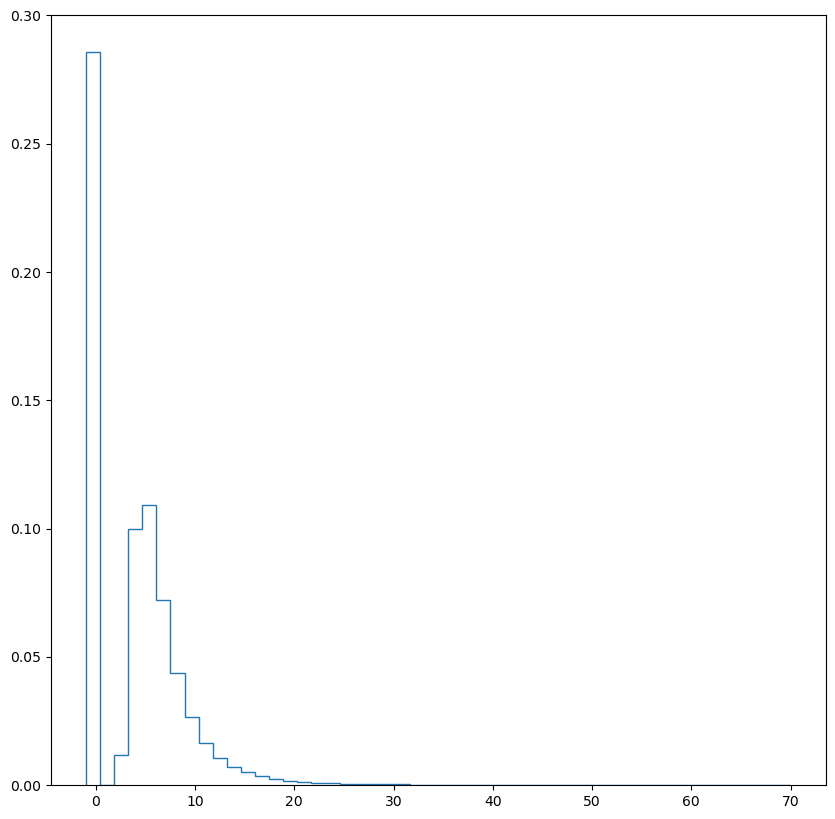

In [4]:
fig = plt.figure(figsize=(10,10))
plt.hist(df['ion_temp'], bins=50, density=True, histtype='step', label='ion_temp')
plt.show()

In [5]:
present_ion_temp = df[df['ion_temp']>0]
print(len(df), len(present_ion_temp))

5529370 3285587


<Figure size 2000x1500 with 0 Axes>

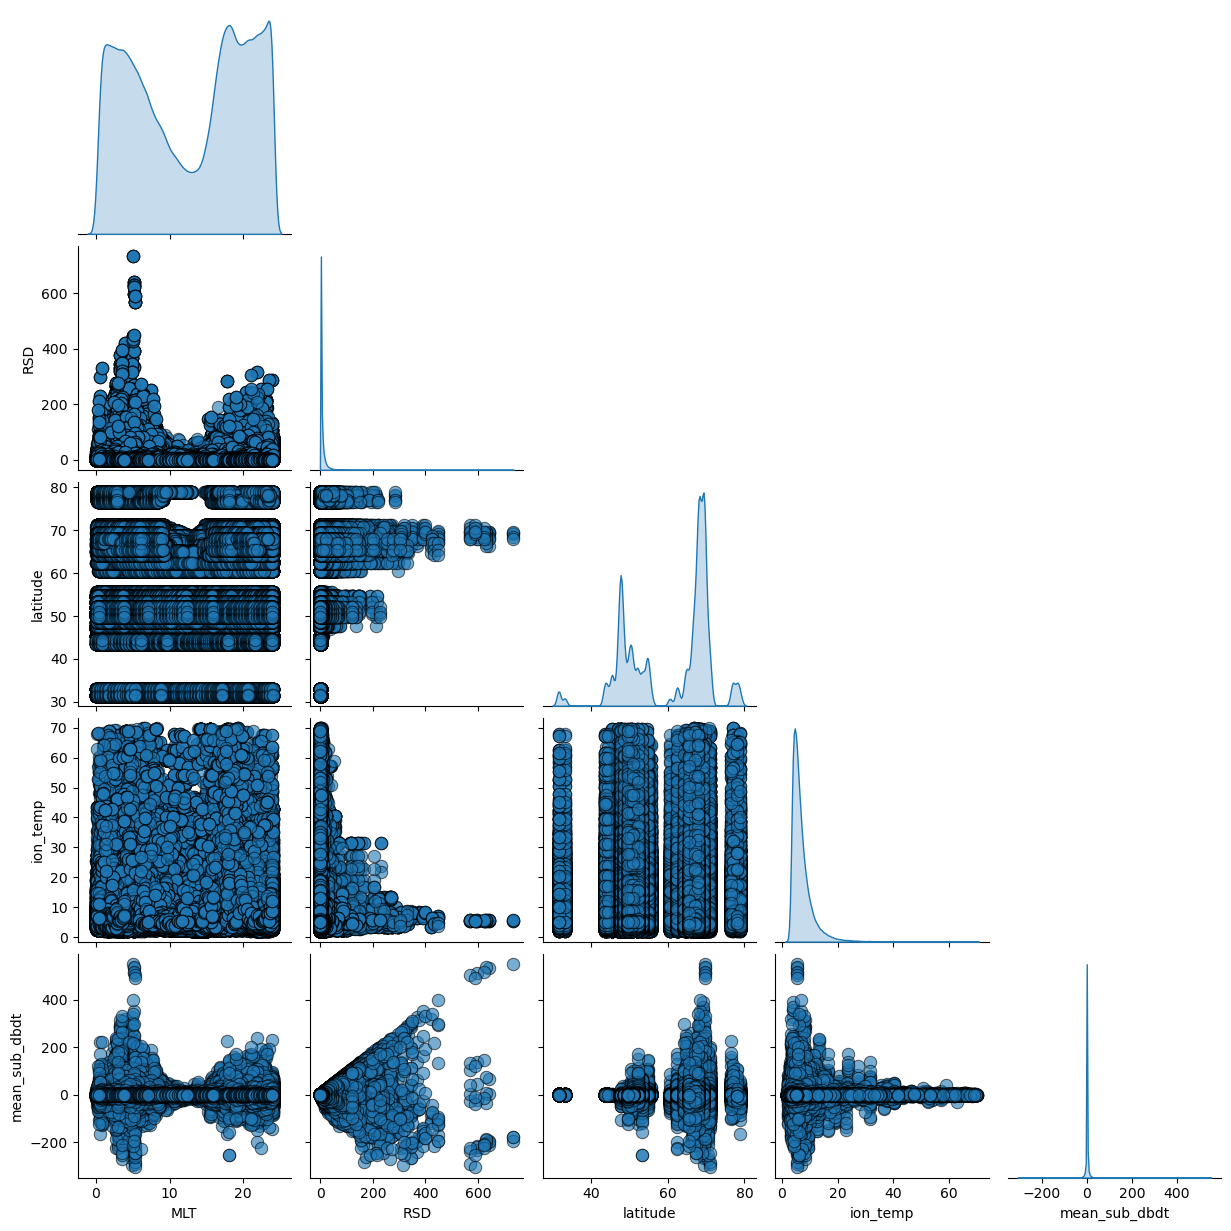

In [6]:
plt.figure(figsize=(20,15))
sns.pairplot(present_ion_temp, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, corner=True)
plt.show()


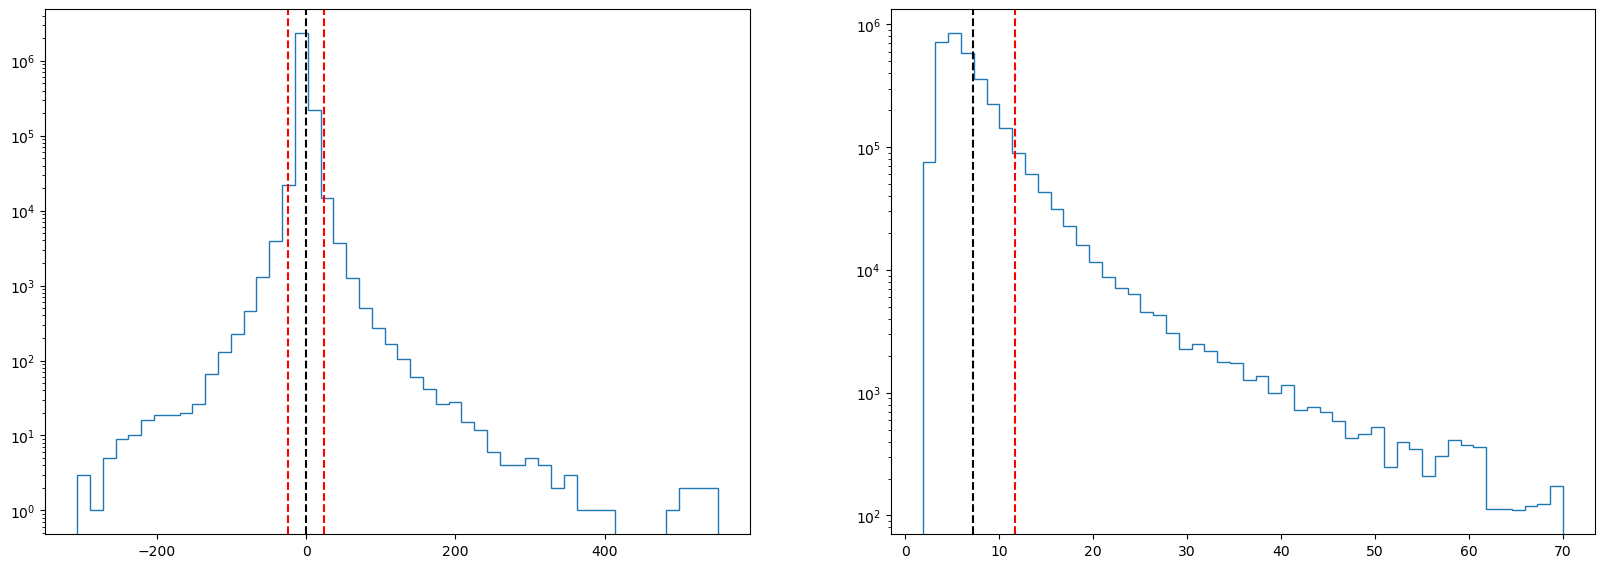

In [7]:
fig = plt.figure(figsize=(20,15))
ax0 = plt.subplot(221)
plt.hist(present_ion_temp['mean_sub_dbdt'], bins=50, density=False, histtype='step', label='mean_sub_dbdt', log=True)
plt.axvline(x=(present_ion_temp['mean_sub_dbdt'].mean()), color='k', linestyle='--')
plt.axvline(x=(present_ion_temp['mean_sub_dbdt'].mean() + 4*present_ion_temp['mean_sub_dbdt'].std()), color='r', linestyle='--')
plt.axvline(x=(present_ion_temp['mean_sub_dbdt'].mean() - 4*present_ion_temp['mean_sub_dbdt'].std()), color='r', linestyle='--')

ax1 = plt.subplot(222)
plt.hist(present_ion_temp['ion_temp'], bins=50, density=False, histtype='step', label='ion_temp', log=True)
plt.axvline(x=(present_ion_temp['ion_temp'].mean() + present_ion_temp['ion_temp'].std()), color='r', linestyle='--')
plt.axvline(x=(present_ion_temp['ion_temp'].mean()), color='k', linestyle='--')
plt.show()

In [8]:
std_mean_sub_dbdt_df = present_ion_temp[(present_ion_temp['mean_sub_dbdt'].abs() > (present_ion_temp['mean_sub_dbdt'].mean() + 4*present_ion_temp['mean_sub_dbdt'].std()))]

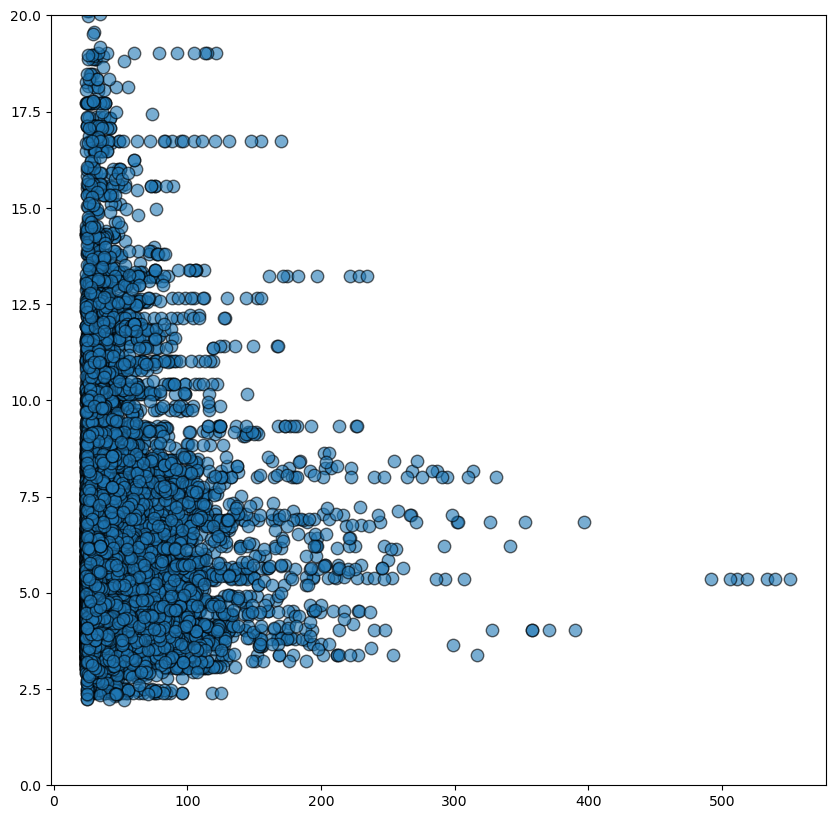

In [9]:
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot(111)
plt.scatter(std_mean_sub_dbdt_df['mean_sub_dbdt'].abs(), std_mean_sub_dbdt_df['ion_temp'], s=80, alpha=0.6, edgecolor='k')
plt.Line2D([0, 0], [500, 60], color='k', linestyle='--')
plt.ylim(0,20)
plt.show()